<a href="https://colab.research.google.com/github/yasirzamir-tech/Pandas_practise/blob/main/Pandas_Practice_1small_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Generating sample data
np.random.seed(42)

num_rows = 50  # You can increase this to 1000+ for more practice

data = {
    "Order_ID": np.arange(1001, 1001 + num_rows),
    "Customer_ID": np.random.choice(["C001", "C002", "C003", "C004", "C005", "C006", "C007"], num_rows),
    "Region": np.random.choice(["North", "South", "East", "West"], num_rows),
    "Product": np.random.choice(["Laptop", "Phone", "Tablet", "Monitor", "Headphones"], num_rows),
    "Category": np.random.choice(["Electronics", "Accessories"], num_rows),
    "Sales": np.random.randint(300, 5000, num_rows),
    "Profit": np.random.randint(-200, 1000, num_rows),
    "Discount": np.random.uniform(0, 0.5, num_rows).round(2),
    "Quantity": np.random.randint(1, 10, num_rows),
    "Order_Date": pd.date_range(start="2023-01-01", periods=num_rows, freq="D")
}

# Creating DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df.head()

,Order_ID,Customer_ID,Region,Product,Category,Sales,Profit,Discount,Quantity,Order_Date
0,1001,C007,North,Monitor,Electronics,3602,263,0.22,7,2023-01-01
1,1002,C004,East,Laptop,Electronics,2537,459,0.50,2,2023-01-02
2,1003,C005,East,Headphones,Accessories,1606,563,0.09,2,2023-01-03
3,1004,C007,North,Headphones,Accessories,4329,754,0.01,1,2023-01-04
4,1005,C003,North,Phone,Accessories,2975,202,0.25,8,2023-01-05


# 1 Basic Check

In [2]:
df.shape

(50, 10)

In [3]:
df.describe()

,Order_ID,Sales,Profit,Discount,Quantity,Order_Date
count,50.00000,50.000000,50.000000,50.00000,50.000000,50
mean,1025.50000,2908.900000,389.040000,0.26020,4.920000,2023-01-25 12:00:00
min,1001.00000,497.000000,-199.000000,0.01000,1.000000,2023-01-01 00:00:00
25%,1013.25000,1830.250000,55.250000,0.15000,3.000000,2023-01-13 06:00:00
50%,1025.50000,3265.000000,368.000000,0.25000,5.000000,2023-01-25 12:00:00
75%,1037.75000,3881.750000,692.000000,0.36750,7.000000,2023-02-06 18:00:00
max,1050.00000,4959.000000,983.000000,0.50000,9.000000,2023-02-19 00:00:00
std,14.57738,1300.417347,367.544803,0.13992,2.570158,NaN


In [4]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Region', 'Product', 'Category', 'Sales',
       'Profit', 'Discount', 'Quantity', 'Order_Date'],
      dtype='object')

In [5]:
df.describe(include="object")

,Customer_ID,Region,Product,Category
count,50,50,50,50
unique,7,4,5,2
top,C004,South,Laptop,Accessories
freq,10,20,15,26


* 4 categorical columns - Customer_ID	Region	Product	Category

* 6 numerical columns - Order_ID	Sales	Profit	Discount	Quantity	Order_Date

In [6]:
df.dtypes

,0
Order_ID,int64
Customer_ID,object
Region,object
Product,object
Category,object
Sales,int64
Profit,int64
Discount,float64
Quantity,int64
Order_Date,datetime64[ns]


In [7]:
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Region,0
Product,0
Category,0
Sales,0
Profit,0
Discount,0
Quantity,0
Order_Date,0


* There are no null values in the dataset

In [8]:
df.duplicated().sum()

np.int64(0)

* There are no duplicated values in the dataset

In [9]:
df.rename(columns={"Profit":"Net_Profit"},inplace=True)

# 2 Data Selection & Filtering

In [10]:
# orders where Sales > 3000.
order_3000 = df[df["Sales"]>3000]
order_3000.shape

(27, 10)

**There are total 27 orders where sale amount is more than 3000**

In [11]:
#  all orders for the product "Laptop" in the South region.
lap_south = df[(df["Product"]=="Laptop")&(df["Region"]=="South")]
lap_south.shape

(6, 10)

** There are in total 6 orders for laptop from south region**

In [12]:
# loss making orders
loss_orders = df[df["Net_Profit"]<0]
loss_orders["Product"].value_counts().reset_index()

,Product,count
0,Laptop,5
1,Headphones,2
2,Tablet,2
3,Phone,1


**Total loss makingorders are 10 , 5 for laptop , 2 for headphones , 2 for tablet and 1 for phone**

In [13]:
df.Discount.mean()

np.float64(0.2602)

In [14]:
# orders where discount is more than average discount

more_disc = df[df["Discount"]>df["Discount"].mean()]
more_disc.shape

(23, 10)

**There are 23 orders where the discount is more than the average discount**

In [15]:
df["Order_Date"].min()

Timestamp('2023-01-01 00:00:00')

In [16]:
df["Order_Date"].max()

Timestamp('2023-02-19 00:00:00')

#  3. Aggregation & Grouping

In [17]:
#  total sales per region.
df.groupby("Region",as_index=False)["Sales"].sum().sort_values(by="Sales",ascending=False)

,Region,Sales
2,South,57477
3,West,41845
1,North,27892
0,East,18231


**The region with highest sales is - South**


**The region with lowest sales is - East**

In [18]:
# average discount given per product category.?
df.groupby("Category")["Discount"].mean().reset_index()

,Category,Discount
0,Accessories,0.231538
1,Electronics,0.291250


In [19]:
#  top 3 most sold products (based on quantity).

df.groupby("Product",as_index=False)["Quantity"].sum().sort_values(by="Quantity",ascending=False).head(3)

,Product,Quantity
1,Laptop,66
4,Tablet,52
2,Monitor,47


**Top 3 selling items areLaptop , tablet and monitor**

In [20]:
# total profit per month.
df["order_month"] = df["Order_Date"].dt.month
df.groupby("order_month")["Sales"].sum()

,Sales
order_month,
1,90726
2,54719


# 4. Data Transformation

In [21]:
# Create a new column Profit_Margin

df["profit_margin"] = (df["Net_Profit"] / df["Sales"])* 100
df.head()

,Order_ID,Customer_ID,Region,Product,Category,Sales,Net_Profit,Discount,Quantity,Order_Date,order_month,profit_margin
0,1001,C007,North,Monitor,Electronics,3602,263,0.22,7,2023-01-01,1,7.301499
1,1002,C004,East,Laptop,Electronics,2537,459,0.50,2,2023-01-02,1,18.092235
2,1003,C005,East,Headphones,Accessories,1606,563,0.09,2,2023-01-03,1,35.056040
3,1004,C007,North,Headphones,Accessories,4329,754,0.01,1,2023-01-04,1,17.417417
4,1005,C003,North,Phone,Accessories,2975,202,0.25,8,2023-01-05,1,6.789916


In [22]:
# Convert the Discount column into percentage format

df["Discount"] = df["Discount"].apply(lambda x : x*100)


In [23]:
df.rename(columns={"Discount":"Discount_percent"},inplace=True)

In [24]:
df

,Order_ID,Customer_ID,Region,Product,Category,Sales,Net_Profit,Discount_percent,Quantity,Order_Date,order_month,profit_margin
0,1001,C007,North,Monitor,Electronics,3602,263,22.0,7,2023-01-01,1,7.301499
1,1002,C004,East,Laptop,Electronics,2537,459,50.0,2,2023-01-02,1,18.092235
2,1003,C005,East,Headphones,Accessories,1606,563,9.0,2,2023-01-03,1,35.056040
3,1004,C007,North,Headphones,Accessories,4329,754,1.0,1,2023-01-04,1,17.417417
4,1005,C003,North,Phone,Accessories,2975,202,25.0,8,2023-01-05,1,6.789916
5,1006,C005,East,Headphones,Electronics,1582,-54,9.0,1,2023-01-06,1,-3.413401
6,1007,C005,South,Phone,Electronics,1009,971,18.0,9,2023-01-07,1,96.233895
7,1008,C007,West,Laptop,Electronics,4713,663,37.0,6,2023-01-08,1,14.067473
8,1009,C002,North,Monitor,Accessories,4048,288,36.0,7,2023-01-09,1,7.114625
9,1010,C003,West,Monitor,Electronics,963,728,15.0,7,2023-01-10,1,75.597092


In [25]:
# Categorize products

df["product_cat"] = df["Sales"].apply(lambda x : "High sales" if x >2000 else "Low sales")

In [26]:
# Sort the dataset by Sales in descending order.

df.sort_values(by="Sales",ascending=False)

,Order_ID,Customer_ID,Region,Product,Category,Sales,Net_Profit,Discount_percent,Quantity,Order_Date,order_month,profit_margin,product_cat
17,1018,C005,West,Laptop,Electronics,4959,-57,45.0,4,2023-01-18,1,-1.149425,High sales
37,1038,C004,South,Tablet,Accessories,4796,943,49.0,5,2023-02-07,2,19.662219,High sales
7,1008,C007,West,Laptop,Electronics,4713,663,37.0,6,2023-01-08,1,14.067473,High sales
39,1040,C007,South,Tablet,Accessories,4689,386,15.0,7,2023-02-09,2,8.232032,High sales
48,1049,C001,West,Tablet,Electronics,4582,137,10.0,3,2023-02-18,2,2.989961,High sales
36,1037,C002,South,Headphones,Electronics,4518,-147,29.0,8,2023-02-06,2,-3.253652,High sales
27,1028,C002,South,Headphones,Electronics,4397,983,2.0,9,2023-01-28,1,22.356152,High sales
3,1004,C007,North,Headphones,Accessories,4329,754,1.0,1,2023-01-04,1,17.417417,High sales
15,1016,C003,North,Laptop,Accessories,4063,-50,49.0,9,2023-01-16,1,-1.230618,High sales
8,1009,C002,North,Monitor,Accessories,4048,288,36.0,7,2023-01-09,1,7.114625,High sales


In [27]:
# Replace all negative profits with 0 (assume no losses are recorded).

df["Net_Profit"] = df["Net_Profit"].apply(lambda x : 0 if x<0 else x)

# 5. Joins & Merging (Using Another Dataset)

In [28]:
# Creating Customer_Details dataset
customer_data = {
    "Customer_ID": ["C001", "C002", "C003", "C004", "C005", "C006", "C007"],
    "Customer_Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace"],
    "City": ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Dallas", "San Francisco"],
    "Age": [25, 32, 28, 40, 35, 30, 27]
}

# Convert to DataFrame
df_customers = pd.DataFrame(customer_data)

# Display
df_customers


,Customer_ID,Customer_Name,City,Age
0,C001,Alice,New York,25
1,C002,Bob,Los Angeles,32
2,C003,Charlie,Chicago,28
3,C004,David,Houston,40
4,C005,Eva,Miami,35
5,C006,Frank,Dallas,30
6,C007,Grace,San Francisco,27


In [29]:
# Merge the sales data with Customer_Details

new_data=df.merge(df_customers,on="Customer_ID")

In [30]:
# average age of customers who bought Laptops.
new_data.groupby("Product",as_index=False)["Age"].mean()

,Product,Age
0,Headphones,32.100000
1,Laptop,31.133333
2,Monitor,30.875000
3,Phone,32.666667
4,Tablet,32.000000


In [31]:
# Identify which city generated the highest sales.
new_data.groupby("City",as_index=False)["Sales"].sum().sort_values(by="Sales",ascending=False).head(1)

,City,Sales
0,Chicago,27680


In [32]:
new_data

,Order_ID,Customer_ID,Region,Product,Category,Sales,Net_Profit,Discount_percent,Quantity,Order_Date,order_month,profit_margin,product_cat,Customer_Name,City,Age
0,1001,C007,North,Monitor,Electronics,3602,263,22.0,7,2023-01-01,1,7.301499,High sales,Grace,San Francisco,27
1,1002,C004,East,Laptop,Electronics,2537,459,50.0,2,2023-01-02,1,18.092235,High sales,David,Houston,40
2,1003,C005,East,Headphones,Accessories,1606,563,9.0,2,2023-01-03,1,35.056040,Low sales,Eva,Miami,35
3,1004,C007,North,Headphones,Accessories,4329,754,1.0,1,2023-01-04,1,17.417417,High sales,Grace,San Francisco,27
4,1005,C003,North,Phone,Accessories,2975,202,25.0,8,2023-01-05,1,6.789916,High sales,Charlie,Chicago,28
5,1006,C005,East,Headphones,Electronics,1582,0,9.0,1,2023-01-06,1,-3.413401,Low sales,Eva,Miami,35
6,1007,C005,South,Phone,Electronics,1009,971,18.0,9,2023-01-07,1,96.233895,Low sales,Eva,Miami,35
7,1008,C007,West,Laptop,Electronics,4713,663,37.0,6,2023-01-08,1,14.067473,High sales,Grace,San Francisco,27
8,1009,C002,North,Monitor,Accessories,4048,288,36.0,7,2023-01-09,1,7.114625,High sales,Bob,Los Angeles,32
9,1010,C003,West,Monitor,Electronics,963,728,15.0,7,2023-01-10,1,75.597092,Low sales,Charlie,Chicago,28


#  6. Time Series Analysis


In [33]:
# total sales per month.
new_data.groupby("order_month")["Sales"].sum()

,Sales
order_month,
1,90726
2,54719


In [34]:
# Identify which day of the week has the highest average sales.
new_data["day"] = new_data["Order_Date"].dt.day

In [35]:
new_data.groupby("day",as_index=False)["Sales"].mean().sort_values(by="Sales")

,day,Sales
25,26,998.0
28,29,1154.0
9,10,1795.0
16,17,1800.0
21,22,1936.0
30,31,2007.0
11,12,2121.0
14,15,2256.0
1,2,2285.0
3,4,2415.5


In [36]:
# Calculate the cumulative sales over time.
sorted_data = new_data.sort_values(by="Order_Date")  # Sort without modifying new_data
sorted_data["Cumulative_Sales"] = sorted_data["Sales"].cumsum()

sorted_data[["Order_Date", "Sales", "Cumulative_Sales"]]


,Order_Date,Sales,Cumulative_Sales
0,2023-01-01,3602,3602
1,2023-01-02,2537,6139
2,2023-01-03,1606,7745
3,2023-01-04,4329,12074
4,2023-01-05,2975,15049
5,2023-01-06,1582,16631
6,2023-01-07,1009,17640
7,2023-01-08,4713,22353
8,2023-01-09,4048,26401
9,2023-01-10,963,27364


In [37]:
#  most common order date

new_data["Order_Date"].mode()[0]

Timestamp('2023-01-01 00:00:00')

In [38]:
# Calculate yearly growth in total sales.
new_data["year"] = new_data["Order_Date"].dt.year

In [39]:
sales_by_day = new_data.groupby("day",as_index=False)["Sales"].sum()

In [40]:
sales_by_day["Growth (%)"] = sales_by_day["Sales"].pct_change() * 100

In [41]:
sales_by_day

,day,Sales,Growth (%)
0,1,6679,NaN
1,2,4570,-31.576583
2,3,5416,18.512035
3,4,4831,-10.801329
4,5,6530,35.168702
5,6,6100,-6.584992
6,7,5805,-4.836066
7,8,5779,-0.447890
8,9,8737,51.185326
9,10,3590,-58.910381


#  7. Data Visualization

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

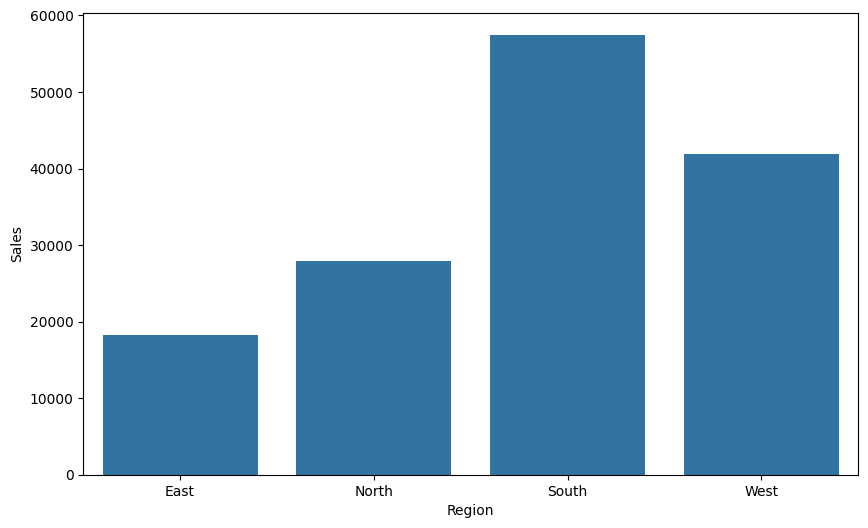

In [43]:
#  bar chart showing total sales per region.
region_wise_sales = new_data.groupby("Region",as_index=False)["Sales"].sum()
plt.figure(figsize=(10,6))
sns.barplot(data=region_wise_sales,x="Region",y="Sales",)
plt.show()

# INSIGHTS

* SOUTH region has the highest number of orders
* EAST region has the lowest no of orders

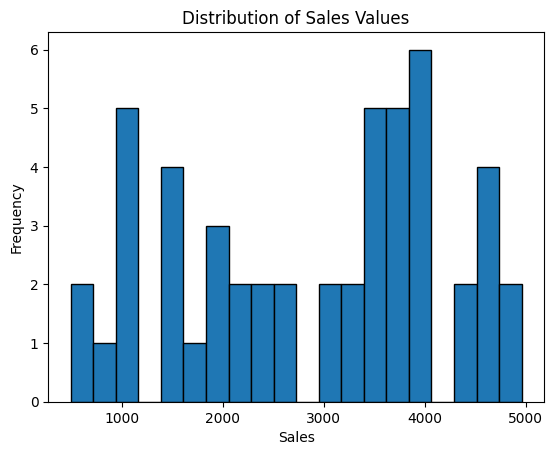

In [44]:
#  histogram of the distribution of Sales values.
plt.hist(new_data["Sales"],bins=20, edgecolor="black")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales Values")
plt.show()

# INSIGHTS

* order frequency of value betweem 3000 and 4000 are more

* order value of 1000 is also more

In [45]:
# line chart of daily sales trends.

monthly = new_data.groupby("day",as_index=False)["Sales"].sum()

<Axes: xlabel='day', ylabel='Sales'>

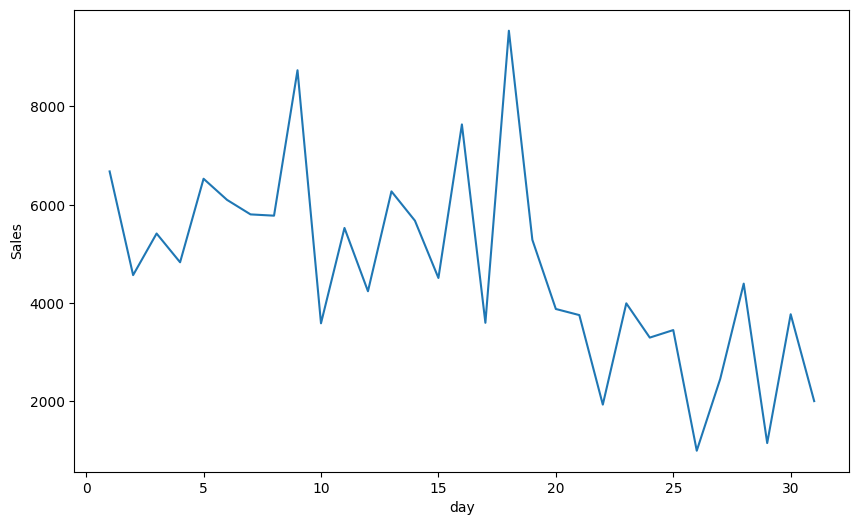

In [46]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly,x="day",y="Sales")

In [47]:
monthly

,day,Sales
0,1,6679
1,2,4570
2,3,5416
3,4,4831
4,5,6530
5,6,6100
6,7,5805
7,8,5779
8,9,8737
9,10,3590


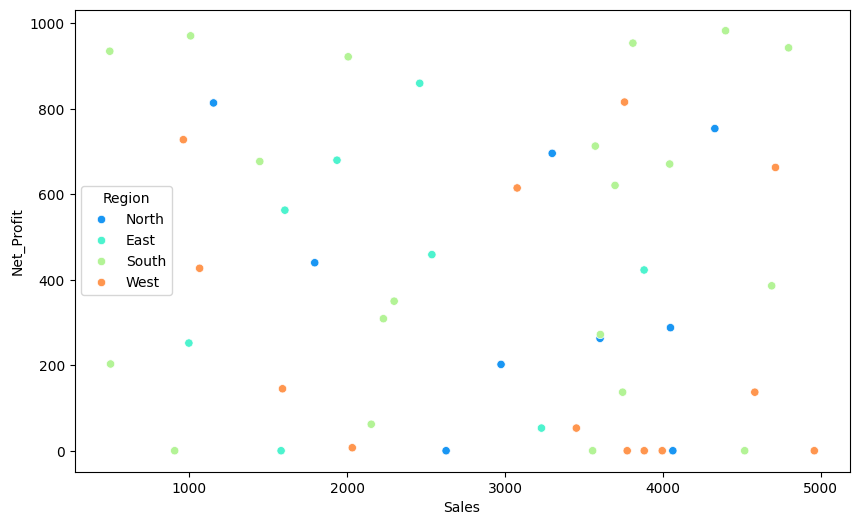

In [48]:
# a scatter plot of Sales vs. Profit.
plt.figure(figsize=(10,6))
sns.scatterplot(data=new_data,x="Sales",y="Net_Profit",hue="Region",palette="rainbow")
plt.show()

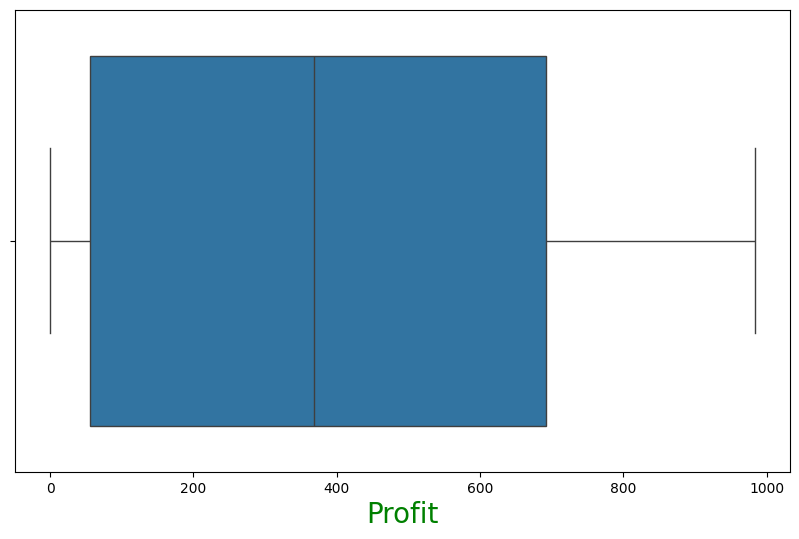

In [49]:
# box plot for Profit
plt.figure(figsize=(10,6))
sns.boxplot(data=new_data,x="Net_Profit")
plt.xlabel("Profit",fontsize=20,color="green")
plt.show()

In [50]:
# heatmap of the correlation
num_val=new_data.select_dtypes(include=["int64","float64"])

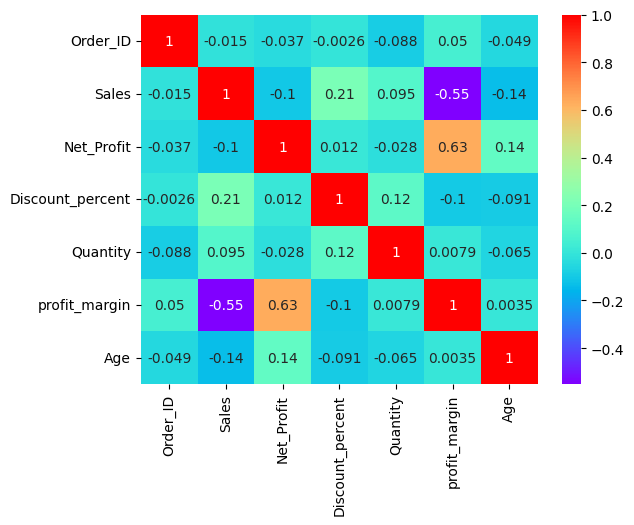

In [51]:
sns.heatmap(num_val.corr(),annot=True,cmap='rainbow')
plt.show()


In [52]:
# Identify outliers in the Profit column using the IQR method.
q1=new_data["Net_Profit"].quantile(0.25)
q3=new_data["Net_Profit"].quantile(0.75)
iqr= q3 - q1

outliers = new_data[(new_data["Net_Profit"] < (q1 - 1.5 * iqr)) | (new_data["Net_Profit"] > (q3 + 1.5 * iqr))]

In [53]:
outliers.shape

(0, 18)

* no outliers in profit

In [54]:
# correlation between discount and profit
new_data["Discount_percent"].corr(new_data["Net_Profit"])

np.float64(0.012327134033071523)

**There is a positive correlation between discount and profit**

<Axes: >

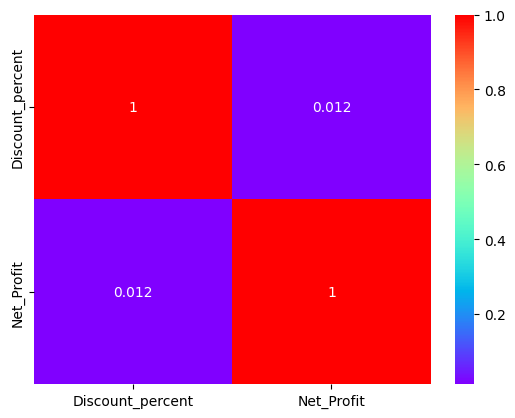

In [55]:
cor = new_data[["Discount_percent","Net_Profit"]]
sns.heatmap(cor.corr(),annot=True,cmap='rainbow')

In [56]:
new_data["Discount_percent"].corr(new_data["Sales"])

np.float64(0.20723801763768232)

**There is a positive correlation between discount and sales**

In [57]:
# order type

new_data["order_type"] = new_data["Net_Profit"].apply(lambda x : "High" if x> 500 else "Low")

In [58]:
new_data["order_type"].value_counts()

,count
order_type,
Low,30
High,20


**30 orders are categorized as low profit and 20 are high profit**

In [59]:
# rolling average of sales over a 7-day window.
roll = new_data.set_index("Order_Date")

In [60]:
roll['roll_avg'] = roll['Sales'].rolling("7D").mean()

# FINAL INSIGHTS  🔎

**Data overview**

*the dataset has 50 rows and 10columns*

*4 categorical columns - Customer_ID Region Product Category*

*6 numerical columns - Order_ID Sales Profit Discount Quantity Order_Date*

*there are no null values*

*There are no duplicated values in the dataset*

**Filter** ⌛

*27 orders where sales amount is> 3000*

*Total loss makin gorders are 10 | 5 for laptop , 2 for headphones , 2 for tablet and 1 for phone*

*There are 23 orders where the discount is more than the average discount ~ 26 %*

**CATEGORIZATION**

*The region with highest sales is - South*  👍
*The region with lowest sales is - East*  👎

*Top 3 selling items areLaptop , tablet and monitor*

*city with highest sales is Chicago having sales of - 27680*

*order frequency of value betweem 3000 and 4000 are more*

**CONCLUSIONS**

*no outliers in profit*

*There is a positive correlation between discount and profit, DISCOUNT on price is  a key parameter for increase in profit*

*There is a positive correlation between discount and sales, DISCOUNT on price is  a key parameter for increase in sales*

*30 orders are categorized as low profit and 20 are high profit where the threshold limit for categorizing is 500.*

**RECCOMENDATIONS**

*EAST region sales needs to be monitored and methods need to be applied like discounts to get more sales hence leeding to more profit*






